In [1]:
import pysam 
import h5py
import numpy as np
import timeit
import random
import pandas as pd
import operator
import matplotlib.pyplot as plt

In [2]:
def resize(resize_dim, pos_, gl, region_size):
    
    m = np.zeros((resize_dim, 3))
    for i, pos in enumerate(pos_):
        j = int(pos * resize_dim / region_size)
        m[j, :] += gl[i]
    
    return m

In [3]:
def parameters():
    
    seg_sites = [2606694,1551724,983510,958052,905056,736677,747172,454489,447438,1509902,1548781,
                 1516390,1265635,1255756,1172649,1034231,618102,885768,660241,518882,310259,330861]
    
    seg_sites_arr = np.array(seg_sites)-150000
    
    idx = random.randint(0, 21)
    
    rand_start = random.randint(1, seg_sites_arr[idx])
    rand_end = rand_start + 150000
    
    chromosome = 'chr_'+str(idx+1)
    
    indi = 'ind_'+str(random.randint(1, 147))
    
    return rand_start, rand_end, chromosome, indi

In [4]:
def region(glf_data):
    
    start_pos = glf_data[0][0]
    end_pos = start_pos + 4e6
    idx = []
    for i, val in enumerate(glf_data):
        if val[0] < end_pos:
            continue
        else:
            idx.append(i)
            break
    
    return idx[0], start_pos

In [5]:
def major_minor(h, idx, strat_pos, mafs):
    
    gl_mat = []
    genomic_pos = []
    for i, val in enumerate(h[0:idx]):
        if mafs[i][2] == b'A' and mafs[i][3] == b'C' or mafs[i][2] == b'C' and mafs[i][3] == b'A':
            gl_mat.append(np.array(operator.itemgetter(1,2,5)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        elif mafs[i][2] == b'A' and mafs[i][3] == b'G' or mafs[i][2] == b'G' and mafs[i][3] == b'A':
            gl_mat.append(np.array(operator.itemgetter(1,3,8)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        elif mafs[i][2] == b'A' and mafs[i][3] == b'T' or mafs[i][2] == b'T' and mafs[i][3] == b'A':
            gl_mat.append(np.array(operator.itemgetter(1,4,10)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        elif mafs[i][2] == b'C' and mafs[i][3] == b'G' or mafs[i][2] == b'G' and mafs[i][3] == b'C':
            gl_mat.append(np.array(operator.itemgetter(5,6,8)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        elif mafs[i][2] == b'C' and mafs[i][3] == b'T' or mafs[i][2] == b'T' and mafs[i][3] == b'C':
            gl_mat.append(np.array(operator.itemgetter(5,7,10)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        elif mafs[i][2] == b'G' and mafs[i][3] == b'T' or mafs[i][2] == b'T' and mafs[i][3] == b'G':
            gl_mat.append(np.array(operator.itemgetter(8,9,10)(val)))
            genomic_pos.append(h[i][0] - start_pos)
        else:
            print('ERROR')
    
    return gl_mat, genomic_pos

In [30]:
times = []
seg_sites = []
test = []
t_0 = timeit.default_timer()
for i in range(200):
    t0 = timeit.default_timer()
    with h5py.File('glf_database.h5', 'r') as f, h5py.File('mafs_data.h5', 'r') as f1:

        start, end, chro, N = parameters()

        mafs = f1['Chromosomes/'+chro][start:end]

        h = f[chro+'/'+N][start:end]

        idx, start_pos = region(h)

        if idx < 40:
            idx, start_pos = region(h)

        gl_mat, genomic_pos = major_minor(h, idx, start_pos, mafs)

        input_ = resize(128, genomic_pos, gl_mat, 4e6)

    t1 = timeit.default_timer()
    time = t1-t0
    times.append(time)
    seg_sites.append(idx)
t_1 = timeit.default_timer()
t_1-t_0

110.87745632301085

Text(0, 0.5, 'seg sites')

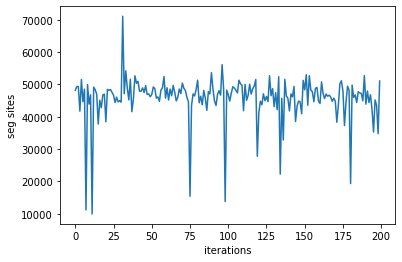

In [37]:
plt.plot(seg_sites)
plt.xlabel('iterations')
plt.ylabel('seg sites')

Text(0, 0.5, 'seconds')

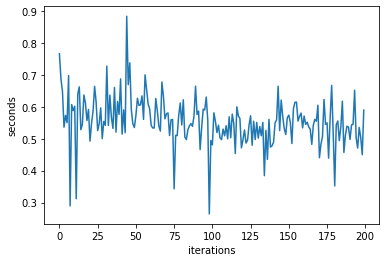

In [38]:
plt.plot(times)
plt.xlabel('iterations')
plt.ylabel('seconds')

In [33]:
def test(glf_file, mafs_file):
    
    with h5py.File(glf_file, 'r') as f, h5py.File(mafs_file, 'r') as f1:

        start, end, chro, N = parameters()

        mafs = f1['Chromosomes/'+chro][start:end]

        h = f[chro+'/'+N][start:end]

        idx, start_pos = region(h)

        if idx < 40:
            idx, start_pos = region(h)

        gl_mat, genomic_pos = major_minor(h, idx, start_pos, mafs)
        
        print('print: ', len(gl_mat), len(genomic_pos))

        input_ = resize(128, genomic_pos, gl_mat, 4e6)
    
    return input_

In [34]:
test('glf_database.h5', 'mafs_data.h5')

print:  43312 43312


IndexError: index 2786 is out of bounds for axis 0 with size 128